# Analisi risultati

Nel notebook vengono svolte alcune analisi sul dataset generato tramite varie
simulazioni su diversi dataset e utilizzando tre diversi classificatori. In
particolare sono stati usati una **SVM**, un **MultiLayer Perceptron** e un
**Random Forest**. Non sono stati effettuati benchmark sulle prestazioni, si
sta infatti considerando solo la qualità dei risultati ottenuti.


In [6]:
import pandas as pd

df = pd.read_csv("../datasets/test.csv")
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dataset_id       1200 non-null   int64  
 1   simulation_id    1200 non-null   int64  
 2   samples          1200 non-null   int64  
 3   features         1200 non-null   int64  
 4   classes          1200 non-null   int64  
 5   clusters         1200 non-null   int64  
 6   population_size  1200 non-null   int64  
 7   point            1200 non-null   int64  
 8   class            1200 non-null   int64  
 9   target           1200 non-null   int64  
 10  model            1200 non-null   object 
 11  min_fitness      1200 non-null   float64
 12  mean_fitness     1200 non-null   float64
 13  fitness_std      1200 non-null   float64
 14  max_fitness      1200 non-null   float64
 15  accuracy         1200 non-null   float64
dtypes: float64(5), int64(10), object(1)
memory usage: 150.1+ KB


None

,dataset_id,simulation_id,samples,features,classes,clusters,population_size,point,class,target,model,min_fitness,mean_fitness,fitness_std,max_fitness,accuracy
0,0,0,10,2,2,1,1000,0,1,0,SVC,-0.855264,-0.696396,0.092766,-0.547943,1.0
1,0,0,10,2,2,1,1000,0,1,1,SVC,-0.197379,-0.104045,0.057211,-0.000054,1.0
2,0,0,10,2,2,1,1000,1,0,0,SVC,-0.143339,-0.073661,0.039783,-0.000221,1.0
3,0,0,10,2,2,1,1000,1,0,1,SVC,-0.572780,-0.484936,0.047278,-0.416159,1.0
4,0,0,10,2,2,1,1000,2,1,0,SVC,-1.160755,-1.096355,0.035346,-1.031373,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,4,10,2,2,2,4000,7,0,1,MLPClassifier,-0.685313,-0.562300,0.068521,-0.445267,1.0
1196,1,4,10,2,2,2,4000,8,0,0,MLPClassifier,-0.178795,-0.093622,0.051011,-0.000323,1.0
1197,1,4,10,2,2,2,4000,8,0,1,MLPClassifier,-0.722029,-0.567538,0.083668,-0.448194,1.0
1198,1,4,10,2,2,2,4000,9,0,0,MLPClassifier,-0.127930,-0.065308,0.035431,-0.000132,1.0


Ogni riga del dataset contiene quindi:

- **dataset_id**: ID univoco per ogni dataset analizzato.
- **point**: ogni punto del dataset viene semplicemente enumerato da $0$ a
  $N-1$, dove $N$ è il numero totale di punti del dataset.
- **class**: classe del punto.
- **target**: classe target dell'algoritmo genetico.
- **model**: il modello classificatore utilizzato.
- **min/mean/max_fitness**: valore minimo, medio e massimo di fitness estratti
  dalla hall of fame prodotta ad ogni esecuzione dell'algoritmo genetico.
- **accuracy**: calcolata come numero di individui nella hall of fame
  classificati nella classe target diviso numero di individui totali presenti
  nella hall of fame.

Possiamo quindi vedere ogni riga come una singola esecuzione dell'algoritmo
genetico su uno specifico punto e su una specifica classe target.

Dato che i valori di fitness non sono altro che la distanza di ogni punto
sintetico dal punto preso in esame, moltiplicata per $-1$. Possiamo quindi
convertire le tre colonne di fitness in valori di distanza rimoltiplicandole
per $-1$ di modo da avere valori meglio interpretabili.


In [2]:
df[["min_fitness", "mean_fitness", "max_fitness"]] *= -1.0
df = df.rename(
    columns={
        "min_fitness": "min_distance",
        "mean_fitness": "mean_distance",
        "max_fitness": "max_distance",
    }
)
df

,dataset_id,simulation_id,samples,features,classes,clusters,population_size,point,class,target,model,min_distance,mean_distance,fitness_std,max_distance,accuracy
0,0,0,10,2,2,1,1000,0,1,0,SVC,0.855264,0.696396,0.092766,0.547943,1.0
1,0,0,10,2,2,1,1000,0,1,1,SVC,0.197379,0.104045,0.057211,0.000054,1.0
2,0,0,10,2,2,1,1000,1,0,0,SVC,0.143339,0.073661,0.039783,0.000221,1.0
3,0,0,10,2,2,1,1000,1,0,1,SVC,0.572780,0.484936,0.047278,0.416159,1.0
4,0,0,10,2,2,1,1000,2,1,0,SVC,1.160755,1.096355,0.035346,1.031373,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,4,10,2,2,2,4000,7,0,1,MLPClassifier,0.685313,0.562300,0.068521,0.445267,1.0
1196,1,4,10,2,2,2,4000,8,0,0,MLPClassifier,0.178795,0.093622,0.051011,0.000323,1.0
1197,1,4,10,2,2,2,4000,8,0,1,MLPClassifier,0.722029,0.567538,0.083668,0.448194,1.0
1198,1,4,10,2,2,2,4000,9,0,0,MLPClassifier,0.127930,0.065308,0.035431,0.000132,1.0


## Precisione

Come prima analisi possiamo andare a vedere i risultati ottenuti da ogni
modello, per ogni dataset in termini di accuracy.


In [3]:
df.groupby(["dataset_id", "model"]).agg(["mean", "std"])["accuracy"].reset_index()


,dataset_id,model,mean,std
0,0,MLPClassifier,1.0,0.0
1,0,SVC,1.0,0.0
2,1,MLPClassifier,1.0,0.0
3,1,SVC,1.0,0.0


Come possiamo notare abbiamo una media di $1.0$ e una deviazione standard
di $0.0$ come sperato. Deduciamo quindi che l'algoritmo genetico abbia prodotto
la popolazione sintetica finale sperata.

## Fitness

Vediamo ora se ci sono differenze signi


In [4]:
mean_fitness = df.groupby(["dataset_id", "model"]).mean()["mean_distance"].reset_index()
mean_fitness

,dataset_id,model,mean_distance
0,0,MLPClassifier,0.493056
1,0,SVC,0.499919
2,1,MLPClassifier,0.561812
3,1,SVC,0.543081


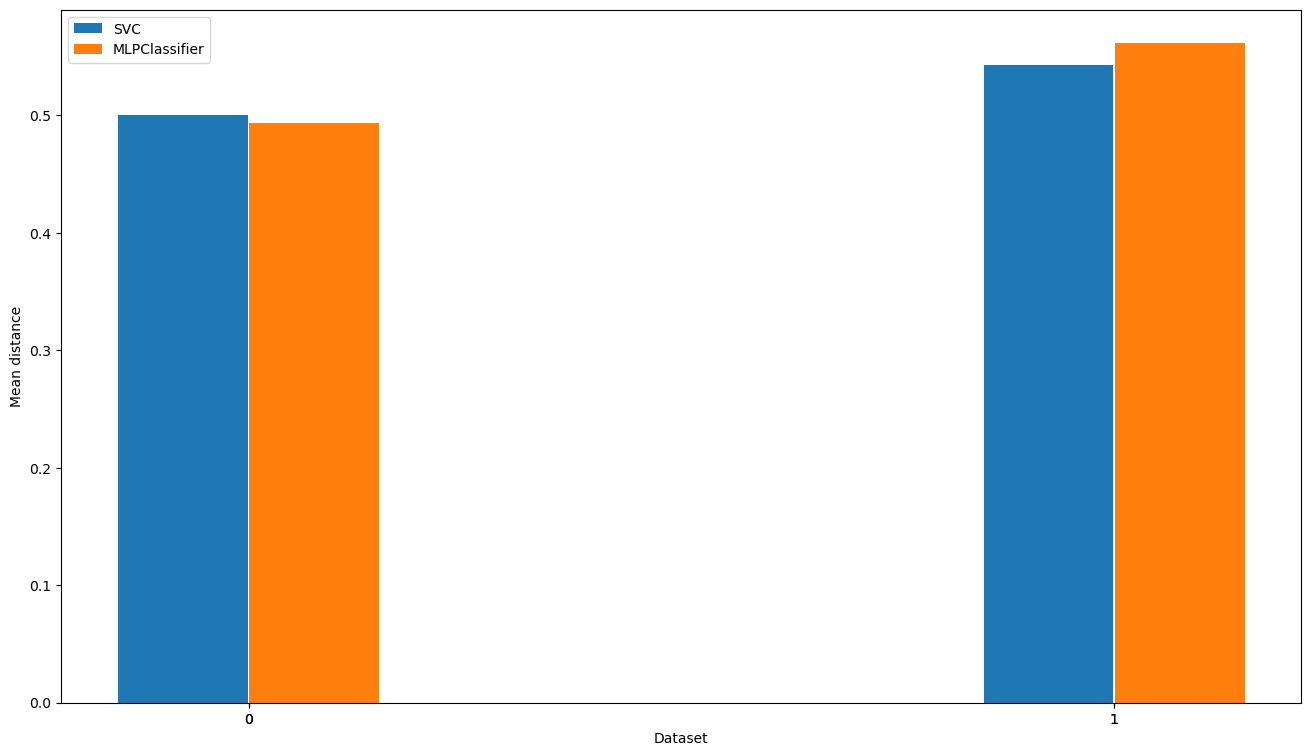

In [5]:
import matplotlib.pyplot as plt

svc = mean_fitness[mean_fitness["model"] == "SVC"]
mlp = mean_fitness[mean_fitness["model"] == "MLPClassifier"]

plt.figure(figsize=(16, 9))
plt.xticks(mean_fitness["dataset_id"])
plt.xlabel("Dataset")
plt.ylabel("Mean distance")

plt.bar(
    x=svc["dataset_id"] - 0.076, height=svc["mean_distance"], width=0.15, label="SVC"
)
plt.bar(
    x=mlp["dataset_id"] + 0.076,
    height=mlp["mean_distance"],
    width=0.15,
    label="MLPClassifier",
)

plt.legend()
plt.show()